In [34]:
from pathlib import Path
import glob
import json

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
import matplotlib.ticker as mticker
import matplotlib.cm as cm
from matplotlib.lines import Line2D

import scienceplots


SINGLE_COL_WIDTH = 3.5
DOUBLE_COL_WIDTH = 7.16
DPI = 150

plt.style.use(["science", "ieee"])
plt.rcParams.update({
    "mathtext.fontset": "cm",
    "text.usetex": False,
})

ref_style = {
    "linestyle": "--",
    "color": "black",
    "alpha": 0.7,
    "linewidth": 1.0,
    "label": "ED Reference",
}

# use the color palette manually, since importing seaborn overrides the paper styles
SB_COLORBLIND = [
    "#0173b2",
    "#de8f05",
    "#029e73",
    "#d55e00",
    "#cc78bc",
    "#ca9161",
    "#fbafe4",
    "#949494",
    "#ece133",
    "#56b4e9",
]

main_style = {
    "linestyle": "-",
    "linewidth": 1.0,
    "alpha": 0.9,
    "marker": "o",
    "markersize": 3,
    "markeredgewidth": 0.0,
    "color": SB_COLORBLIND[0],
}

SUPPORT_GUIDE_LS = (0, (1.5, 2.8))  # a bit finer than (2,2)
SUPPORT_GUIDE_LW = 0.75            # thinner
SUPPORT_GUIDE_A  = 0.30            # more transparent
SUPPORT_GUIDE_C  = "0.20"          # slightly lighter gray
SUPPORT_LABEL_A  = 1.0
SUPPORT_LABEL_T = r"Support $g$"

print("Global styles defined.")

Global styles defined.


Saved: tfim_4x4_data_scaling.pdf


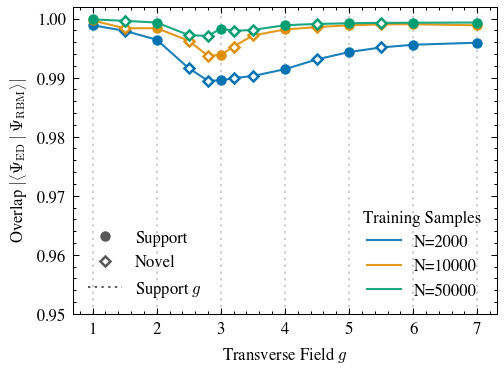

In [21]:
# =========================
# Cell 2 - Overlap vs g
# =========================
from pathlib import Path
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.lines import Line2D

SAVE_FIG = True
FILENAME = "tfim_4x4_data_scaling.pdf"
COLUMN_MODE = "single"

XLIM = None
YLIM = (0.95, 1.002)
FIELD_SYMBOL = "g"

# --- markers ---
MARKER_SHAPE_SUPPORT = "o"   # round markers for support
MARKER_SHAPE_NOVEL   = "D"   # diamonds for novel

MARKER_SIZE_SUPPORT = 5.0
MARKER_SIZE_NOVEL   = 3.3
MARKER_EDGE_NOVEL   = 1.2

# --- legend marker color (left legend) ---
LEGEND_MARKER_C = "0.35"   # grey
LEGEND_MARKER_A = 1.0

# --- y ticks ---
Y_TICK_STEP = 0.01
Y_TICK_FMT  = "%.2f"

# Setup figure size
width  = SINGLE_COL_WIDTH if COLUMN_MODE == "single" else DOUBLE_COL_WIDTH
height = width * 0.75

fig, ax = plt.subplots(figsize=(width, height), dpi=DPI)

# Load experiment data
exp_dir = Path(".")
report_files = sorted(exp_dir.glob("*_report.json"))
if not report_files:
    raise FileNotFoundError(f"No '*_report.json' files found in: {exp_dir.resolve()}")

experiments = []
for fpath in report_files:
    with open(fpath, "r") as f:
        experiments.append(json.load(f))
experiments.sort(key=lambda x: x.get("config", {}).get("n_samples", np.inf))

# Color palette (frozen, seaborn-free)
colors = SB_COLORBLIND

# Collect unique support g values
support_g = set()

for i, exp in enumerate(experiments):
    n = exp["config"]["n_samples"]
    df = pd.DataFrame(exp["results"])
    supp = df[df["type"] == "support"]
    nov  = df[df["type"] == "novel"]
    color = colors[i % len(colors)]

    support_g.update(supp["h"].values)

    # main trend line (legend handle "N=...") - NO MARKER in legend
    ax.plot(
        df["h"], df["overlap"],
        color=color,
        label=f"N={n}",
        linestyle=main_style.get("linestyle", "-"),
        linewidth=main_style.get("linewidth", 1.0),
        alpha=main_style.get("alpha", 0.5),
    )

    # support points (filled circles) - no legend entry
    ax.plot(
        supp["h"], supp["overlap"],
        linestyle="None",
        marker=MARKER_SHAPE_SUPPORT,
        markersize=MARKER_SIZE_SUPPORT,
        color=color,
        markerfacecolor=color,
        markeredgewidth=0.0,
        label="_nolegend_",
    )

    # novel points (open diamonds) - no legend entry
    ax.plot(
        nov["h"], nov["overlap"],
        linestyle="None",
        marker=MARKER_SHAPE_NOVEL,
        markersize=MARKER_SIZE_NOVEL,
        color=color,
        markerfacecolor="white",
        markeredgewidth=MARKER_EDGE_NOVEL,
        label="_nolegend_",
    )

# Draw support guides ONCE (no legend contribution)
for g0 in sorted(support_g):
    ax.axvline(
        g0,
        linestyle=SUPPORT_GUIDE_LS,
        linewidth=SUPPORT_GUIDE_LW,
        alpha=SUPPORT_GUIDE_A,
        color=SUPPORT_GUIDE_C,
        zorder=0,
        label="_nolegend_",
    )

# Axis labels
ax.set_xlabel(rf"Transverse Field ${FIELD_SYMBOL}$")
ax.set_ylabel(
    r"Overlap $\left|\left\langle \Psi_\mathrm{ED}\mid \Psi_\mathrm{RBM}\right\rangle\right|$"
)

# Axis limits
if XLIM is not None:
    ax.set_xlim(*XLIM)
if YLIM is not None:
    ax.set_ylim(*YLIM)

# Y ticks
ax.yaxis.set_major_locator(mticker.MultipleLocator(Y_TICK_STEP))
ax.yaxis.set_major_formatter(mticker.FormatStrFormatter(Y_TICK_FMT))

# Right legend: training samples only
leg_samples = ax.legend(
    loc="lower right",
    title="Training Samples",
    frameon=False,
)

# Left legend: marker meaning (TOP) + support guides (below)
custom_handles = [
    # --- marker semantics first (at top) ---
    Line2D(
        [0], [0],
        linestyle="None",
        marker=MARKER_SHAPE_SUPPORT,
        markersize=MARKER_SIZE_SUPPORT,
        markerfacecolor=LEGEND_MARKER_C,
        markeredgecolor=LEGEND_MARKER_C,
        markeredgewidth=0.0,
        alpha=LEGEND_MARKER_A,
        label="Support",
    ),
    Line2D(
        [0], [0],
        linestyle="None",
        marker=MARKER_SHAPE_NOVEL,
        markersize=MARKER_SIZE_NOVEL,
        markerfacecolor="white",
        markeredgecolor=LEGEND_MARKER_C,
        markeredgewidth=MARKER_EDGE_NOVEL,
        alpha=LEGEND_MARKER_A,
        label="Novel",
    ),
    # --- support guides last (below) ---
    Line2D(
        [0], [0],
        linestyle=SUPPORT_GUIDE_LS,
        linewidth=SUPPORT_GUIDE_LW,
        color=SUPPORT_GUIDE_C,
        alpha=SUPPORT_LABEL_A,
        label=SUPPORT_LABEL_T,
    ),
]

leg_guides = ax.legend(
    handles=custom_handles,
    loc="lower left",
    frameon=False,
)

ax.add_artist(leg_samples)

# Final layout
ax.grid(False)
fig.tight_layout()

if SAVE_FIG:
    fig.savefig(FILENAME, bbox_inches="tight")
    print(f"Saved: {FILENAME}")

plt.show()

Saved: tfim_4x4_data_scaling.pdf


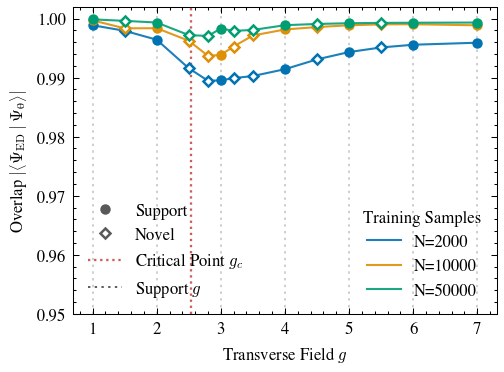

In [35]:
# =========================
# Cell 2 - Overlap vs g
# =========================
from pathlib import Path
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.lines import Line2D

SAVE_FIG = True
FILENAME = "tfim_4x4_data_scaling.pdf"
COLUMN_MODE = "single"

XLIM = None
YLIM = (0.95, 1.002)
FIELD_SYMBOL = "g"

# --- markers ---
MARKER_SHAPE_SUPPORT = "o"   # round markers for support
MARKER_SHAPE_NOVEL   = "D"   # diamonds for novel

MARKER_SIZE_SUPPORT = 5.0
MARKER_SIZE_NOVEL   = 3.3
MARKER_EDGE_NOVEL   = 1.2

# --- legend marker color (left legend) ---
LEGEND_MARKER_C = "0.35"   # grey
LEGEND_MARKER_A = 1.0

# --- Critical Point (NEW) ---
GC_VAL   = 2.54
GC_COLOR = "indianred"
GC_STYLE = ":"
GC_WIDTH = 1.1
GC_LABEL = r"Critical Point $g_c$"

# --- y ticks ---
Y_TICK_STEP = 0.01
Y_TICK_FMT  = "%.2f"

# Setup figure size
width  = SINGLE_COL_WIDTH if COLUMN_MODE == "single" else DOUBLE_COL_WIDTH
height = width * 0.75

fig, ax = plt.subplots(figsize=(width, height), dpi=DPI)

# Load experiment data
exp_dir = Path(".")
report_files = sorted(exp_dir.glob("*_report.json"))
if not report_files:
    raise FileNotFoundError(f"No '*_report.json' files found in: {exp_dir.resolve()}")

experiments = []
for fpath in report_files:
    with open(fpath, "r") as f:
        experiments.append(json.load(f))
experiments.sort(key=lambda x: x.get("config", {}).get("n_samples", np.inf))

# Color palette (frozen, seaborn-free)
colors = SB_COLORBLIND

# Collect unique support g values
support_g = set()

for i, exp in enumerate(experiments):
    n = exp["config"]["n_samples"]
    df = pd.DataFrame(exp["results"])
    supp = df[df["type"] == "support"]
    nov  = df[df["type"] == "novel"]
    color = colors[i % len(colors)]

    support_g.update(supp["h"].values)

    # main trend line (legend handle "N=...") - NO MARKER in legend
    ax.plot(
        df["h"], df["overlap"],
        color=color,
        label=f"N={n}",
        linestyle=main_style.get("linestyle", "-"),
        linewidth=main_style.get("linewidth", 1.0),
        alpha=main_style.get("alpha", 0.5),
    )

    # support points (filled circles) - no legend entry
    ax.plot(
        supp["h"], supp["overlap"],
        linestyle="None",
        marker=MARKER_SHAPE_SUPPORT,
        markersize=MARKER_SIZE_SUPPORT,
        color=color,
        markerfacecolor=color,
        markeredgewidth=0.0,
        label="_nolegend_",
    )

    # novel points (open diamonds) - no legend entry
    ax.plot(
        nov["h"], nov["overlap"],
        linestyle="None",
        marker=MARKER_SHAPE_NOVEL,
        markersize=MARKER_SIZE_NOVEL,
        color=color,
        markerfacecolor="white",
        markeredgewidth=MARKER_EDGE_NOVEL,
        label="_nolegend_",
    )

# Draw support guides ONCE (no legend contribution)
for g0 in sorted(support_g):
    ax.axvline(
        g0,
        linestyle=SUPPORT_GUIDE_LS,
        linewidth=SUPPORT_GUIDE_LW,
        alpha=SUPPORT_GUIDE_A,
        color=SUPPORT_GUIDE_C,
        zorder=0,
        label="_nolegend_",
    )

# Draw Critical Point Line (NEW)
ax.axvline(
    GC_VAL,
    linestyle=GC_STYLE,
    linewidth=GC_WIDTH,
    color=GC_COLOR,
    zorder=0.25,
    label="_nolegend_"
)

# Axis labels
ax.set_xlabel(rf"Transverse Field ${FIELD_SYMBOL}$")
ax.set_ylabel(
    r"Overlap $\left|\left\langle \Psi_\mathrm{ED}\mid \Psi_{\mathrm{θ}}\right\rangle\right|$"
)

# Axis limits
if XLIM is not None:
    ax.set_xlim(*XLIM)
if YLIM is not None:
    ax.set_ylim(*YLIM)

# Y ticks
ax.yaxis.set_major_locator(mticker.MultipleLocator(Y_TICK_STEP))
ax.yaxis.set_major_formatter(mticker.FormatStrFormatter(Y_TICK_FMT))

# Right legend: training samples only
leg_samples = ax.legend(
    loc="lower right",
    title="Training Samples",
    frameon=False,
)

# Left legend: marker meaning (TOP) + Critical Point + support guides (below)
custom_handles = [
    # --- marker semantics first (at top) ---
    Line2D(
        [0], [0],
        linestyle="None",
        marker=MARKER_SHAPE_SUPPORT,
        markersize=MARKER_SIZE_SUPPORT,
        markerfacecolor=LEGEND_MARKER_C,
        markeredgecolor=LEGEND_MARKER_C,
        markeredgewidth=0.0,
        alpha=LEGEND_MARKER_A,
        label="Support",
    ),
    Line2D(
        [0], [0],
        linestyle="None",
        marker=MARKER_SHAPE_NOVEL,
        markersize=MARKER_SIZE_NOVEL,
        markerfacecolor="white",
        markeredgecolor=LEGEND_MARKER_C,
        markeredgewidth=MARKER_EDGE_NOVEL,
        alpha=LEGEND_MARKER_A,
        label="Novel",
    ),
    # --- Critical Point (Middle) ---
    Line2D(
        [0], [0],
        color=GC_COLOR,
        linestyle=GC_STYLE,
        linewidth=GC_WIDTH,
        label=GC_LABEL
    ),
    # --- support guides last (below) ---
    Line2D(
        [0], [0],
        linestyle=SUPPORT_GUIDE_LS,
        linewidth=SUPPORT_GUIDE_LW,
        color=SUPPORT_GUIDE_C,
        alpha=SUPPORT_LABEL_A,
        label=SUPPORT_LABEL_T,
    ),
]

leg_guides = ax.legend(
    handles=custom_handles,
    loc="lower left",
    frameon=False,
)

ax.add_artist(leg_samples)

# Final layout
ax.grid(False)
fig.tight_layout()

if SAVE_FIG:
    fig.savefig(FILENAME, bbox_inches="tight")
    print(f"Saved: {FILENAME}")

plt.show()

Saved: tfim_4x4_data_scaling.pdf


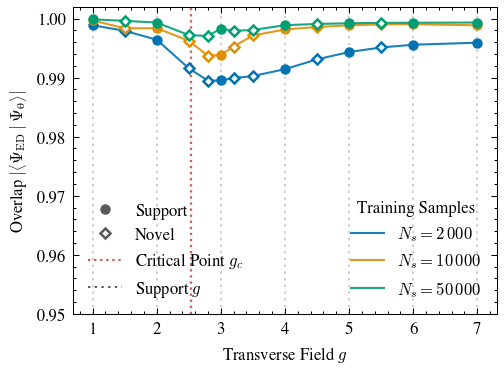

In [37]:
# =========================
# Cell 2 - Overlap vs g
# =========================
from pathlib import Path
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.lines import Line2D

SAVE_FIG = True
FILENAME = "tfim_4x4_data_scaling.pdf"
COLUMN_MODE = "single"

XLIM = None
YLIM = (0.95, 1.002)
FIELD_SYMBOL = "g"

# --- markers ---
MARKER_SHAPE_SUPPORT = "o"   # round markers for support
MARKER_SHAPE_NOVEL   = "D"   # diamonds for novel

MARKER_SIZE_SUPPORT = 5.0
MARKER_SIZE_NOVEL   = 3.3
MARKER_EDGE_NOVEL   = 1.2

# --- legend marker color (left legend) ---
LEGEND_MARKER_C = "0.35"   # grey
LEGEND_MARKER_A = 1.0

# --- Critical Point ---
GC_VAL   = 2.54
GC_COLOR = "indianred"
GC_STYLE = ":"
GC_WIDTH = 1.1
GC_LABEL = r"Critical Point $g_c$"

# --- y ticks ---
Y_TICK_STEP = 0.01
Y_TICK_FMT  = "%.2f"

# Setup figure size
width  = SINGLE_COL_WIDTH if COLUMN_MODE == "single" else DOUBLE_COL_WIDTH
height = width * 0.75

fig, ax = plt.subplots(figsize=(width, height), dpi=DPI)

# Load experiment data
exp_dir = Path(".")
report_files = sorted(exp_dir.glob("*_report.json"))
if not report_files:
    raise FileNotFoundError(f"No '*_report.json' files found in: {exp_dir.resolve()}")

experiments = []
for fpath in report_files:
    with open(fpath, "r") as f:
        experiments.append(json.load(f))
experiments.sort(key=lambda x: x.get("config", {}).get("n_samples", np.inf))

# Color palette (frozen, seaborn-free)
colors = SB_COLORBLIND

# Collect unique support g values
support_g = set()

for i, exp in enumerate(experiments):
    n = exp["config"]["n_samples"]
    n_tex = f"{n:,}".replace(",", r"\,")  # LaTeX-style thousands separator

    df = pd.DataFrame(exp["results"])
    supp = df[df["type"] == "support"]
    nov  = df[df["type"] == "novel"]
    color = colors[i % len(colors)]

    support_g.update(supp["h"].values)

    # main trend line (legend handle shows N_s)
    ax.plot(
        df["h"], df["overlap"],
        color=color,
        label=rf"$N_s={n_tex}$",
        linestyle=main_style.get("linestyle", "-"),
        linewidth=main_style.get("linewidth", 1.0),
        alpha=main_style.get("alpha", 0.5),
    )

    # support points (filled circles) - no legend entry
    ax.plot(
        supp["h"], supp["overlap"],
        linestyle="None",
        marker=MARKER_SHAPE_SUPPORT,
        markersize=MARKER_SIZE_SUPPORT,
        color=color,
        markerfacecolor=color,
        markeredgewidth=0.0,
        label="_nolegend_",
    )

    # novel points (open diamonds) - no legend entry
    ax.plot(
        nov["h"], nov["overlap"],
        linestyle="None",
        marker=MARKER_SHAPE_NOVEL,
        markersize=MARKER_SIZE_NOVEL,
        color=color,
        markerfacecolor="white",
        markeredgewidth=MARKER_EDGE_NOVEL,
        label="_nolegend_",
    )

# Draw support guides ONCE
for g0 in sorted(support_g):
    ax.axvline(
        g0,
        linestyle=SUPPORT_GUIDE_LS,
        linewidth=SUPPORT_GUIDE_LW,
        alpha=SUPPORT_GUIDE_A,
        color=SUPPORT_GUIDE_C,
        zorder=0,
        label="_nolegend_",
    )

# Draw critical point
ax.axvline(
    GC_VAL,
    linestyle=GC_STYLE,
    linewidth=GC_WIDTH,
    color=GC_COLOR,
    zorder=0.25,
    label="_nolegend_",
)

# Axis labels
ax.set_xlabel(rf"Transverse Field ${FIELD_SYMBOL}$")
ax.set_ylabel(
    r"Overlap $\left|\left\langle \Psi_\mathrm{ED}\mid \Psi_{\mathrm{θ}}\right\rangle\right|$"
)

# Axis limits
if XLIM is not None:
    ax.set_xlim(*XLIM)
if YLIM is not None:
    ax.set_ylim(*YLIM)

# Y ticks
ax.yaxis.set_major_locator(mticker.MultipleLocator(Y_TICK_STEP))
ax.yaxis.set_major_formatter(mticker.FormatStrFormatter(Y_TICK_FMT))

# Right legend: training samples only
leg_samples = ax.legend(
    loc="lower right",
    title=r"Training Samples",
    frameon=False,
)

# Left legend: marker semantics + guides
custom_handles = [
    Line2D(
        [0], [0],
        linestyle="None",
        marker=MARKER_SHAPE_SUPPORT,
        markersize=MARKER_SIZE_SUPPORT,
        markerfacecolor=LEGEND_MARKER_C,
        markeredgecolor=LEGEND_MARKER_C,
        markeredgewidth=0.0,
        alpha=LEGEND_MARKER_A,
        label="Support",
    ),
    Line2D(
        [0], [0],
        linestyle="None",
        marker=MARKER_SHAPE_NOVEL,
        markersize=MARKER_SIZE_NOVEL,
        markerfacecolor="white",
        markeredgecolor=LEGEND_MARKER_C,
        markeredgewidth=MARKER_EDGE_NOVEL,
        alpha=LEGEND_MARKER_A,
        label="Novel",
    ),
    Line2D(
        [0], [0],
        color=GC_COLOR,
        linestyle=GC_STYLE,
        linewidth=GC_WIDTH,
        label=GC_LABEL,
    ),
    Line2D(
        [0], [0],
        linestyle=SUPPORT_GUIDE_LS,
        linewidth=SUPPORT_GUIDE_LW,
        color=SUPPORT_GUIDE_C,
        alpha=SUPPORT_LABEL_A,
        label=SUPPORT_LABEL_T,
    ),
]

leg_guides = ax.legend(
    handles=custom_handles,
    loc="lower left",
    frameon=False,
)

ax.add_artist(leg_samples)

# Final layout
ax.grid(False)
fig.tight_layout()

if SAVE_FIG:
    fig.savefig(FILENAME, bbox_inches="tight")
    print(f"Saved: {FILENAME}")

plt.show()


In [23]:
# --- Load Data Plot 1 ---
file_path = Path("tfim_4x4_suscept_rbm_mc_20251216_010908.csv")
ref_file = Path("tfim_4x4_suscept_ref.csv")

if file_path.exists():
    df = pd.read_csv(file_path)
    h_eval = df["h"].values
    chi_values = df["chi_F"].values
else:
    # Dummy data
    h_eval = np.linspace(1, 4, 20)
    chi_values = np.exp(-(h_eval-2.5)**2)

ref_df = pd.read_csv(ref_file) if ref_file.exists() else None
XLIM = (0.95, 4.05)
print("Data for Plot 1 loaded.")

Data for Plot 1 loaded.


Saved: tfim_4x4_susceptibility_narrow.svg


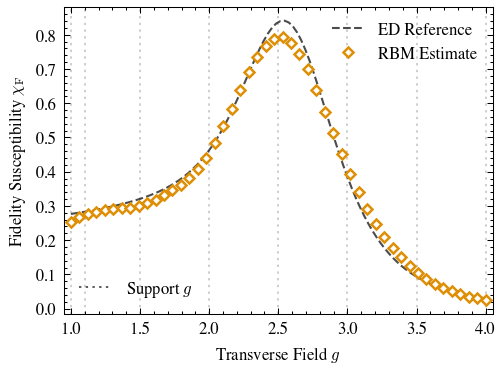

In [24]:
# =========================
# Cell 3 - Fidelity susceptibility (narrow)
# =========================
SAVE_FIG = True
FILENAME = "tfim_4x4_susceptibility_narrow.svg"
COLUMN_MODE = "single"

support_lines = [1.00, 1.10, 1.50, 2.00, 2.50, 3.00, 3.50, 4.00]

# --- marker style (open diamond) ---
MARKER_SHAPE = "D"
MARKER_SIZE  = 3.3
MARKER_EDGE  = 1.2

# --- main color: use your frozen seaborn-free palette (orange) ---
MAIN_COLOR = SB_COLORBLIND[1]

width  = SINGLE_COL_WIDTH if COLUMN_MODE == "single" else DOUBLE_COL_WIDTH
height = width * 0.75

fig, ax = plt.subplots(figsize=(width, height), dpi=DPI)

# helps keep guides visible but still behind data
ax.patch.set_zorder(0)

# 1) Reference curve (MATCH global ref_style exactly)
if ref_df is not None and len(ref_df) > 0:
    _ref = dict(ref_style)
    _ref.pop("label", None)  # set label explicitly
    ax.plot(
        ref_df["h"].values,
        ref_df["chi_F"].values,
        label="ED Reference",
        zorder=1,
        **_ref,
    )

# 2) RBM estimate (markers only)
ax.plot(
    h_eval,
    chi_values,
    linestyle="None",
    marker=MARKER_SHAPE,
    markersize=MARKER_SIZE,
    color=MAIN_COLOR,
    markerfacecolor="white",
    markeredgewidth=MARKER_EDGE,
    label="RBM Estimate",
    zorder=2,
)

# 3) Support lines (vertical guides) - use GLOBAL support styling
for g0 in support_lines:
    ax.axvline(
        g0,
        linestyle=SUPPORT_GUIDE_LS,
        linewidth=SUPPORT_GUIDE_LW,
        alpha=SUPPORT_GUIDE_A,
        color=SUPPORT_GUIDE_C,
        zorder=0.2,
        label="_nolegend_",
    )

ax.set_xlabel(r"Transverse Field $g$")
ax.set_ylabel(r"Fidelity Susceptibility $\chi_\mathrm{F}$")

if XLIM is not None:
    ax.set_xlim(*XLIM)

# --- split legends (support bottom-left, proxy artist with GLOBAL styling) ---
leg_main = ax.legend(loc="upper right", frameon=False)

support_handle = Line2D(
    [0], [0],
    color=SUPPORT_GUIDE_C,
    linestyle=SUPPORT_GUIDE_LS,
    linewidth=SUPPORT_GUIDE_LW,
    alpha=SUPPORT_LABEL_A,
    label=SUPPORT_LABEL_T,
)
leg_support = ax.legend(handles=[support_handle], loc="lower left", frameon=False)
ax.add_artist(leg_main)

ax.grid(False)
fig.tight_layout()

if SAVE_FIG:
    fig.savefig(FILENAME, bbox_inches="tight")
    print(f"Saved: {FILENAME}")

plt.show()

Saved: tfim_4x4_susceptibility_hero.svg


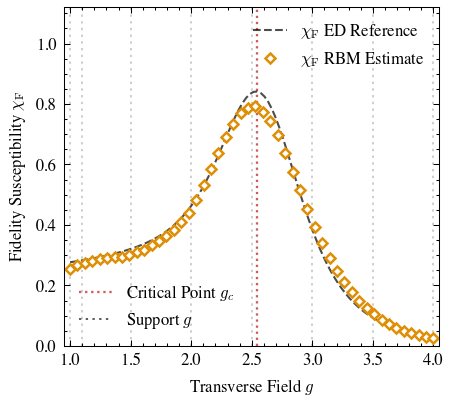

In [33]:
# =========================
# Cell 3 - Fidelity susceptibility (narrow)
# =========================
SAVE_FIG = True
FILENAME = "tfim_4x4_susceptibility_hero.svg"
COLUMN_MODE = "single"

# --- Y-Axis Limits (Updated) ---
YLIM = (0.0, 1.12)

support_lines = [1.00, 1.10, 1.50, 2.00, 2.50, 3.00, 3.50, 4.00]

# --- marker style (open diamond) ---
MARKER_SHAPE = "D"
MARKER_SIZE  = 3.3
MARKER_EDGE  = 1.2

# --- Critical Point (NEW) ---
GC_VAL   = 2.54
GC_COLOR = "indianred"
GC_STYLE = ":"
GC_WIDTH = 1.1
GC_LABEL = r"Critical Point $g_c$"

# --- main color: use your frozen seaborn-free palette (orange) ---
MAIN_COLOR = SB_COLORBLIND[1]

width  = SINGLE_COL_WIDTH * 0.9
height = width * 0.9

fig, ax = plt.subplots(figsize=(width, height), dpi=DPI)

# helps keep guides visible but still behind data
ax.patch.set_zorder(0)

# 1) Reference curve (MATCH global ref_style exactly)
if ref_df is not None and len(ref_df) > 0:
    _ref = dict(ref_style)
    _ref.pop("label", None)  # set label explicitly
    ax.plot(
        ref_df["h"].values,
        ref_df["chi_F"].values,
        label="$\chi_\mathrm{F}$ ED Reference",
        zorder=1,
        **_ref,
    )

# 2) RBM estimate (markers only)
ax.plot(
    h_eval,
    chi_values,
    linestyle="None",
    marker=MARKER_SHAPE,
    markersize=MARKER_SIZE,
    color=MAIN_COLOR,
    markerfacecolor="white",
    markeredgewidth=MARKER_EDGE,
    label="$\chi_\mathrm{F}$ RBM Estimate",
    zorder=2,
)

# 3) Support lines (vertical guides) - use GLOBAL support styling
for g0 in support_lines:
    ax.axvline(
        g0,
        linestyle=SUPPORT_GUIDE_LS,
        linewidth=SUPPORT_GUIDE_LW,
        alpha=SUPPORT_GUIDE_A,
        color=SUPPORT_GUIDE_C,
        zorder=0.2,
        label="_nolegend_",
    )

# 4) Critical Point Line (NEW)
ax.axvline(
    GC_VAL,
    linestyle=GC_STYLE,
    linewidth=GC_WIDTH,
    color=GC_COLOR,
    zorder=0.25,
    label="_nolegend_"
)

ax.set_xlabel(r"Transverse Field $g$")
ax.set_ylabel(r"Fidelity Susceptibility $\chi_\mathrm{F}$")

# --- Set Axis Limits ---
if XLIM is not None:
    ax.set_xlim(*XLIM)
if YLIM is not None:
    ax.set_ylim(*YLIM)

# --- split legends (support/critical bottom-left, proxy artist with GLOBAL styling) ---
leg_main = ax.legend(loc="upper right", frameon=False)

# Handle 1: Critical Point
crit_handle = Line2D(
    [0], [0],
    color=GC_COLOR,
    linestyle=GC_STYLE,
    linewidth=GC_WIDTH,
    label=GC_LABEL
)

# Handle 2: Support
support_handle = Line2D(
    [0], [0],
    color=SUPPORT_GUIDE_C,
    linestyle=SUPPORT_GUIDE_LS,
    linewidth=SUPPORT_GUIDE_LW,
    alpha=SUPPORT_LABEL_A,
    label=SUPPORT_LABEL_T,
)

leg_support = ax.legend(
    handles=[crit_handle, support_handle],
    loc="lower left",
    frameon=False
)

ax.add_artist(leg_main)

ax.grid(False)
fig.tight_layout()

if SAVE_FIG:
    fig.savefig(FILENAME, bbox_inches="tight")
    print(f"Saved: {FILENAME}")

plt.show()

In [11]:
SIDE_LENGTH = 4  # <- set this

base = f"tfim_{SIDE_LENGTH}x{SIDE_LENGTH}_magnetizations"
paths = {
    "full":       Path(f"{base}_full.csv"),
    "three_point":Path(f"{base}_two_point.csv"),
    "one_point":  Path(f"{base}_one_point.csv"),
    "ref":        Path(f"{base}_ref.csv"),
}

def _load_csv(p: Path) -> pd.DataFrame:
    if p.exists():
        return pd.read_csv(p)
    print(f"[warn] missing: {p}")
    return None

df_full  = _load_csv(paths["full"])
df_three = _load_csv(paths["three_point"])
df_one   = _load_csv(paths["one_point"])
ref_df   = _load_csv(paths["ref"])

Saved: tfim_4x4_magnetization.pdf


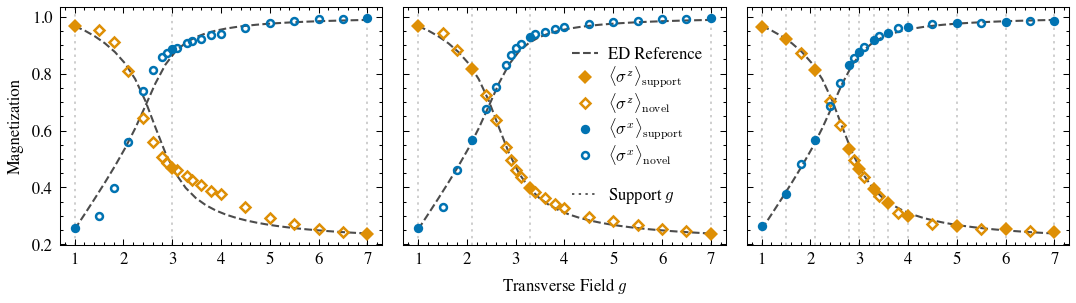

In [32]:
# =========================
# Cell B - Plot magnetizations (3 panels)
# (single aligned legend, ordered + global support styling)
# Reference curves now use the EXACT same pattern as your susceptibility cell:
#   _ref = dict(ref_style); _ref.pop("label", None); ax.plot(..., **_ref)
# =========================
from matplotlib.lines import Line2D

SAVE_FIG     = True
FILENAME     = f"tfim_{SIDE_LENGTH}x{SIDE_LENGTH}_magnetization.pdf"
COLUMN_MODE  = "double"   # "single" or "double"
FIELD_SYMBOL = "g"

# -------------------------
# DOMINANT DIALS
# -------------------------
LEGEND_ANCHOR_X = 0.95   # smaller = further away from right edge (more inset)
LEGEND_ANCHOR_Y = 0.50
LABELSPACING_MARKERS = 0.08   # tighter marker block spacing
LABELSPACING_DEFAULT = 0.18   # keep support spacing sensible

# --- Marker knobs (flipped marker types) ---
MARKER_SHAPE_Z       = "D"   # z: diamond
MARKER_SHAPE_X       = "o"   # x: round
MARKER_SIZE_SUPPORT  = 4.5
MARKER_SIZE_NOVEL    = 3.3
MARKER_EDGE_NOVEL    = 1.2

# --- colors (flipped colors) ---
COLOR_Z = SB_COLORBLIND[1]  # orange
COLOR_X = SB_COLORBLIND[0]  # blue

def _plot_panel(ax, df, ref_df):
    if df is None:
        ax.text(0.5, 0.5, "missing data file", ha="center", va="center", transform=ax.transAxes)
        ax.grid(False)
        return

    supp = df[df["type"] == "support"]
    nov  = df[df["type"] == "novel"]

    # Support guide lines (vertical) -- GLOBAL style
    support_g = np.unique(supp["h"].to_numpy())
    for g0 in support_g:
        ax.axvline(
            g0,
            linestyle=SUPPORT_GUIDE_LS,
            linewidth=SUPPORT_GUIDE_LW,
            alpha=SUPPORT_GUIDE_A,
            color=SUPPORT_GUIDE_C,
            zorder=0,
            label="_nolegend_",
        )

    # Reference (ED) - EXACT style pattern as susceptibility cell
    if ref_df is not None and len(ref_df) > 0:
        _ref = dict(ref_style)
        _ref.pop("label", None)  # set label explicitly in legend proxy only
        ax.plot(ref_df["h"], ref_df["mag_z"], label="_nolegend_", zorder=1, **_ref)
        ax.plot(ref_df["h"], ref_df["mag_x"], label="_nolegend_", zorder=1, **_ref)

    # Support (filled)
    ax.plot(
        supp["h"], supp["mz"],
        linestyle="None", marker=MARKER_SHAPE_Z, color=COLOR_Z,
        markersize=MARKER_SIZE_SUPPORT, markeredgewidth=0.0, markerfacecolor=COLOR_Z,
        label="_nolegend_", zorder=2,
    )
    ax.plot(
        supp["h"], supp["mx"],
        linestyle="None", marker=MARKER_SHAPE_X, color=COLOR_X,
        markersize=MARKER_SIZE_SUPPORT, markeredgewidth=0.0, markerfacecolor=COLOR_X,
        label="_nolegend_", zorder=2,
    )

    # Novel (open)
    ax.plot(
        nov["h"], nov["mz"],
        linestyle="None", marker=MARKER_SHAPE_Z, color=COLOR_Z,
        markersize=MARKER_SIZE_NOVEL, mfc="none", mew=MARKER_EDGE_NOVEL,
        label="_nolegend_", zorder=2,
    )
    ax.plot(
        nov["h"], nov["mx"],
        linestyle="None", marker=MARKER_SHAPE_X, color=COLOR_X,
        markersize=MARKER_SIZE_NOVEL, mfc="none", mew=MARKER_EDGE_NOVEL,
        label="_nolegend_", zorder=2,
    )

    ax.grid(False)

width  = SINGLE_COL_WIDTH if COLUMN_MODE == "single" else DOUBLE_COL_WIDTH
height = width * 0.28

fig, axes = plt.subplots(
    1, 3,
    figsize=(width, height),
    dpi=DPI,
    sharey=True,
    gridspec_kw={"wspace": 0.06},
    constrained_layout=True,
)

_plot_panel(axes[0], df_one,   ref_df)
_plot_panel(axes[1], df_three, ref_df)
_plot_panel(axes[2], df_full,  ref_df)

axes[0].set_ylabel("Magnetization")
axes[0].set_xlabel("")
axes[2].set_xlabel("")
axes[1].set_xlabel(rf"Transverse Field ${FIELD_SYMBOL}$")

# =========================
# Single legend (ORDER + ALIGNMENT)
# =========================
# Legend proxy for ED reference: also built from ref_style (same idea as above)
_ref_leg = dict(ref_style)
_ref_leg.pop("label", None)
ref_handle = Line2D(
    [0], [0],
    color=_ref_leg.get("color", "gray"),
    linestyle=_ref_leg.get("linestyle", "--"),
    linewidth=_ref_leg.get("linewidth", 1.0),
    alpha=_ref_leg.get("alpha", 1.0),
)

z_support = Line2D([0], [0], marker=MARKER_SHAPE_Z, linestyle="None",
                   color=COLOR_Z, markerfacecolor=COLOR_Z, markeredgewidth=0.0,
                   markersize=MARKER_SIZE_SUPPORT)
z_novel   = Line2D([0], [0], marker=MARKER_SHAPE_Z, linestyle="None",
                   color=COLOR_Z, markerfacecolor="none", markeredgewidth=MARKER_EDGE_NOVEL,
                   markersize=MARKER_SIZE_NOVEL)

x_support = Line2D([0], [0], marker=MARKER_SHAPE_X, linestyle="None",
                   color=COLOR_X, markerfacecolor=COLOR_X, markeredgewidth=0.0,
                   markersize=MARKER_SIZE_SUPPORT)
x_novel   = Line2D([0], [0], marker=MARKER_SHAPE_X, linestyle="None",
                   color=COLOR_X, markerfacecolor="none", markeredgewidth=MARKER_EDGE_NOVEL,
                   markersize=MARKER_SIZE_NOVEL)

# spacer ONLY before support guides (keep that gap)
spacer_before_support = Line2D([0], [0], linestyle="None", marker=None, linewidth=0, alpha=0)

support_guide = Line2D(
    [0], [0],
    color=SUPPORT_GUIDE_C,
    linestyle=SUPPORT_GUIDE_LS,
    linewidth=SUPPORT_GUIDE_LW,
    alpha=SUPPORT_LABEL_A,
)

handles = [
    ref_handle,
    z_support,
    z_novel,
    x_support,
    x_novel,
    spacer_before_support,
    support_guide,
]
labels = [
    ref_style.get("label", "ED Reference"),
    r'$\langle \sigma^z \rangle_{\mathrm{support}}$',
    r'$\langle \sigma^z \rangle_{\mathrm{novel}}$',
    r'$\langle \sigma^x \rangle_{\mathrm{support}}$',
    r'$\langle \sigma^x \rangle_{\mathrm{novel}}$',
    " ",
    SUPPORT_LABEL_T,
]

axes[1].legend(
    handles, labels,
    loc="center right",
    bbox_to_anchor=(LEGEND_ANCHOR_X, LEGEND_ANCHOR_Y),
    frameon=False,
    handlelength=1.6,
    handletextpad=0.6,
    labelspacing=LABELSPACING_MARKERS,
    borderaxespad=0.0,
)

for ax in axes:
    ax.xaxis.set_major_locator(mticker.MultipleLocator(1.0))
    ax.xaxis.set_major_formatter(mticker.FormatStrFormatter("%d"))

if SAVE_FIG:
    fig.savefig(FILENAME, bbox_inches="tight")
    print(f"Saved: {FILENAME}")

plt.show()

Saved: tfim_4x4_magnetization.pdf


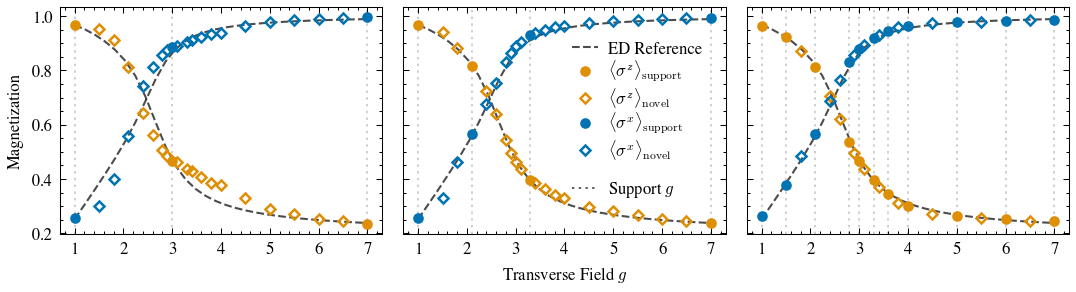

In [17]:
# =========================
# Cell B - Plot magnetizations (3 panels)
# (single aligned legend, ordered + global support styling)
# Reference curves now use the EXACT same pattern as your susceptibility cell:
#   _ref = dict(ref_style); _ref.pop("label", None); ax.plot(..., **_ref)
# =========================
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.lines import Line2D

SAVE_FIG     = True
FILENAME     = f"tfim_{SIDE_LENGTH}x{SIDE_LENGTH}_magnetization.pdf"
COLUMN_MODE  = "double"   # "single" or "double"
FIELD_SYMBOL = "g"

# -------------------------
# DOMINANT DIALS
# -------------------------
LEGEND_ANCHOR_X = 0.95   # smaller = further away from right edge (more inset)
LEGEND_ANCHOR_Y = 0.50
LABELSPACING_MARKERS = 0.08   # tighter marker block spacing
LABELSPACING_DEFAULT = 0.18   # keep support spacing sensible

# --- Marker knobs (BY TYPE: support vs novel) ---
MARKER_SHAPE_SUPPORT = "o"   # support: round
MARKER_SHAPE_NOVEL   = "D"   # novel: diamond
MARKER_SIZE_SUPPORT  = 5.1
MARKER_SIZE_NOVEL    = 3.2
MARKER_EDGE_NOVEL    = 1.2

# --- colors (z vs x) ---
COLOR_Z = SB_COLORBLIND[1]  # orange
COLOR_X = SB_COLORBLIND[0]  # blue

def _plot_panel(ax, df, ref_df):
    if df is None:
        ax.text(0.5, 0.5, "missing data file", ha="center", va="center", transform=ax.transAxes)
        ax.grid(False)
        return

    supp = df[df["type"] == "support"]
    nov  = df[df["type"] == "novel"]

    # Support guide lines (vertical) -- GLOBAL style
    support_g = np.unique(supp["h"].to_numpy())
    for g0 in support_g:
        ax.axvline(
            g0,
            linestyle=SUPPORT_GUIDE_LS,
            linewidth=SUPPORT_GUIDE_LW,
            alpha=SUPPORT_GUIDE_A,
            color=SUPPORT_GUIDE_C,
            zorder=0,
            label="_nolegend_",
        )

    # Reference (ED) - EXACT style pattern as susceptibility cell
    if ref_df is not None and len(ref_df) > 0:
        _ref = dict(ref_style)
        _ref.pop("label", None)  # set label explicitly in legend proxy only
        ax.plot(ref_df["h"], ref_df["mag_z"], label="_nolegend_", zorder=1, **_ref)
        ax.plot(ref_df["h"], ref_df["mag_x"], label="_nolegend_", zorder=1, **_ref)

    # Support (filled) -> ROUND
    ax.plot(
        supp["h"], supp["mz"],
        linestyle="None", marker=MARKER_SHAPE_SUPPORT, color=COLOR_Z,
        markersize=MARKER_SIZE_SUPPORT, markeredgewidth=0.0, markerfacecolor=COLOR_Z,
        label="_nolegend_", zorder=2,
    )
    ax.plot(
        supp["h"], supp["mx"],
        linestyle="None", marker=MARKER_SHAPE_SUPPORT, color=COLOR_X,
        markersize=MARKER_SIZE_SUPPORT, markeredgewidth=0.0, markerfacecolor=COLOR_X,
        label="_nolegend_", zorder=2,
    )

    # Novel (open) -> DIAMOND
    ax.plot(
        nov["h"], nov["mz"],
        linestyle="None", marker=MARKER_SHAPE_NOVEL, color=COLOR_Z,
        markersize=MARKER_SIZE_NOVEL, mfc="none", mew=MARKER_EDGE_NOVEL,
        label="_nolegend_", zorder=2,
    )
    ax.plot(
        nov["h"], nov["mx"],
        linestyle="None", marker=MARKER_SHAPE_NOVEL, color=COLOR_X,
        markersize=MARKER_SIZE_NOVEL, mfc="none", mew=MARKER_EDGE_NOVEL,
        label="_nolegend_", zorder=2,
    )

    ax.grid(False)

width  = SINGLE_COL_WIDTH if COLUMN_MODE == "single" else DOUBLE_COL_WIDTH
height = width * 0.27

fig, axes = plt.subplots(
    1, 3,
    figsize=(width, height),
    dpi=DPI,
    sharey=True,
    gridspec_kw={"wspace": 0.06},
    constrained_layout=True,
)

_plot_panel(axes[0], df_one,   ref_df)
_plot_panel(axes[1], df_three, ref_df)
_plot_panel(axes[2], df_full,  ref_df)

axes[0].set_ylabel("Magnetization")
axes[0].set_xlabel("")
axes[2].set_xlabel("")
axes[1].set_xlabel(rf"Transverse Field ${FIELD_SYMBOL}$")

# =========================
# Single legend (ORDER + ALIGNMENT)
# =========================
# Legend proxy for ED reference: also built from ref_style (same idea as above)
_ref_leg = dict(ref_style)
_ref_leg.pop("label", None)
ref_handle = Line2D(
    [0], [0],
    color=_ref_leg.get("color", "gray"),
    linestyle=_ref_leg.get("linestyle", "--"),
    linewidth=_ref_leg.get("linewidth", 1.0),
    alpha=_ref_leg.get("alpha", 1.0),
)

z_support = Line2D([0], [0], marker=MARKER_SHAPE_SUPPORT, linestyle="None",
                   color=COLOR_Z, markerfacecolor=COLOR_Z, markeredgewidth=0.0,
                   markersize=MARKER_SIZE_SUPPORT)
z_novel   = Line2D([0], [0], marker=MARKER_SHAPE_NOVEL, linestyle="None",
                   color=COLOR_Z, markerfacecolor="none", markeredgewidth=MARKER_EDGE_NOVEL,
                   markersize=MARKER_SIZE_NOVEL)

x_support = Line2D([0], [0], marker=MARKER_SHAPE_SUPPORT, linestyle="None",
                   color=COLOR_X, markerfacecolor=COLOR_X, markeredgewidth=0.0,
                   markersize=MARKER_SIZE_SUPPORT)
x_novel   = Line2D([0], [0], marker=MARKER_SHAPE_NOVEL, linestyle="None",
                   color=COLOR_X, markerfacecolor="none", markeredgewidth=MARKER_EDGE_NOVEL,
                   markersize=MARKER_SIZE_NOVEL)

# spacer ONLY before support guides (keep that gap)
spacer_before_support = Line2D([0], [0], linestyle="None", marker=None, linewidth=0, alpha=0)

support_guide = Line2D(
    [0], [0],
    color=SUPPORT_GUIDE_C,
    linestyle=SUPPORT_GUIDE_LS,
    linewidth=SUPPORT_GUIDE_LW,
    alpha=SUPPORT_LABEL_A,
)

handles = [
    ref_handle,
    z_support,
    z_novel,
    x_support,
    x_novel,
    spacer_before_support,
    support_guide,
]
labels = [
    ref_style.get("label", "ED Reference"),
    r'$\langle \sigma^z \rangle_{\mathrm{support}}$',
    r'$\langle \sigma^z \rangle_{\mathrm{novel}}$',
    r'$\langle \sigma^x \rangle_{\mathrm{support}}$',
    r'$\langle \sigma^x \rangle_{\mathrm{novel}}$',
    " ",
    SUPPORT_LABEL_T,
]

axes[1].legend(
    handles, labels,
    loc="center right",
    bbox_to_anchor=(LEGEND_ANCHOR_X, LEGEND_ANCHOR_Y),
    frameon=False,
    handlelength=1.6,
    handletextpad=0.6,
    labelspacing=LABELSPACING_MARKERS,
    borderaxespad=0.0,
)

for ax in axes:
    ax.xaxis.set_major_locator(mticker.MultipleLocator(1.0))
    ax.xaxis.set_major_formatter(mticker.FormatStrFormatter("%d"))

if SAVE_FIG:
    fig.savefig(FILENAME, bbox_inches="tight")
    print(f"Saved: {FILENAME}")

plt.show()


Saved: tfim_4x4_magnetization.pdf


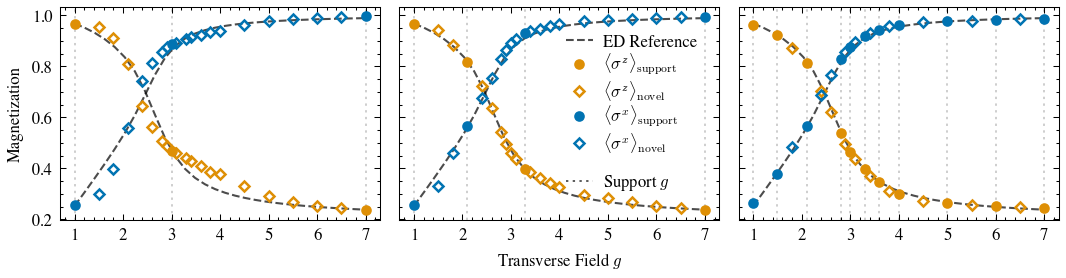

In [43]:
# =========================
# Cell B - Plot magnetizations (3 panels)
# (single aligned legend, ordered + global support styling)
# Reference curves now use the EXACT same pattern as your susceptibility cell:
#   _ref = dict(ref_style); _ref.pop("label", None); ax.plot(..., **_ref)
# IMPORTANT: deterministic export size (NO bbox_inches="tight", NO constrained_layout)
# =========================
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.lines import Line2D

SAVE_FIG     = True
FILENAME     = f"tfim_{SIDE_LENGTH}x{SIDE_LENGTH}_magnetization.pdf"
COLUMN_MODE  = "double"   # "single" or "double"
FIELD_SYMBOL = "g"

# -------------------------
# DOMINANT DIALS
# -------------------------
LEGEND_ANCHOR_X = 0.95   # smaller = further away from right edge (more inset)
LEGEND_ANCHOR_Y = 0.50

LABELSPACING_MARKERS = 0.08
LABELSPACING_DEFAULT = 0.18

# deterministic margins (avoid constrained_layout differences between screen/pdf)
FIG_LEFT   = 0.055
FIG_RIGHT  = 0.985
FIG_BOTTOM = 0.30
FIG_TOP    = 0.92
PANEL_WSPACE = 0.06

# --- Marker knobs (BY TYPE: support vs novel) ---
MARKER_SHAPE_SUPPORT = "o"   # support: round
MARKER_SHAPE_NOVEL   = "D"   # novel: diamond
MARKER_SIZE_SUPPORT  = 5.1
MARKER_SIZE_NOVEL    = 3.2
MARKER_EDGE_NOVEL    = 1.2

# --- colors (z vs x) ---
COLOR_Z = SB_COLORBLIND[1]  # orange
COLOR_X = SB_COLORBLIND[0]  # blue

def _plot_panel(ax, df, ref_df):
    if df is None:
        ax.text(0.5, 0.5, "missing data file", ha="center", va="center", transform=ax.transAxes)
        ax.grid(False)
        return

    supp = df[df["type"] == "support"]
    nov  = df[df["type"] == "novel"]

    # Support guide lines (vertical) -- GLOBAL style
    support_g = np.unique(supp["h"].to_numpy())
    for g0 in support_g:
        ax.axvline(
            g0,
            linestyle=SUPPORT_GUIDE_LS,
            linewidth=SUPPORT_GUIDE_LW,
            alpha=SUPPORT_GUIDE_A,
            color=SUPPORT_GUIDE_C,
            zorder=0,
            label="_nolegend_",
        )

    # Reference (ED) - EXACT style pattern as susceptibility cell
    if ref_df is not None and len(ref_df) > 0:
        _ref = dict(ref_style)
        _ref.pop("label", None)  # set label explicitly in legend proxy only
        ax.plot(ref_df["h"], ref_df["mag_z"], label="_nolegend_", zorder=1, **_ref)
        ax.plot(ref_df["h"], ref_df["mag_x"], label="_nolegend_", zorder=1, **_ref)

    # Support (filled) -> ROUND
    ax.plot(
        supp["h"], supp["mz"],
        linestyle="None", marker=MARKER_SHAPE_SUPPORT, color=COLOR_Z,
        markersize=MARKER_SIZE_SUPPORT, markeredgewidth=0.0, markerfacecolor=COLOR_Z,
        label="_nolegend_", zorder=2,
    )
    ax.plot(
        supp["h"], supp["mx"],
        linestyle="None", marker=MARKER_SHAPE_SUPPORT, color=COLOR_X,
        markersize=MARKER_SIZE_SUPPORT, markeredgewidth=0.0, markerfacecolor=COLOR_X,
        label="_nolegend_", zorder=2,
    )

    # Novel (open) -> DIAMOND
    ax.plot(
        nov["h"], nov["mz"],
        linestyle="None", marker=MARKER_SHAPE_NOVEL, color=COLOR_Z,
        markersize=MARKER_SIZE_NOVEL, mfc="none", mew=MARKER_EDGE_NOVEL,
        label="_nolegend_", zorder=2,
    )
    ax.plot(
        nov["h"], nov["mx"],
        linestyle="None", marker=MARKER_SHAPE_NOVEL, color=COLOR_X,
        markersize=MARKER_SIZE_NOVEL, mfc="none", mew=MARKER_EDGE_NOVEL,
        label="_nolegend_", zorder=2,
    )

    ax.grid(False)

width  = SINGLE_COL_WIDTH if COLUMN_MODE == "single" else DOUBLE_COL_WIDTH
height = width * 0.32

fig, axes = plt.subplots(
    1, 3,
    figsize=(width, height),
    dpi=DPI,
    sharey=True,
    gridspec_kw={"wspace": PANEL_WSPACE},
    constrained_layout=False,   # IMPORTANT: keep False for deterministic PDF sizing
)

_plot_panel(axes[0], df_one,   ref_df)
_plot_panel(axes[1], df_three, ref_df)
_plot_panel(axes[2], df_full,  ref_df)

axes[0].set_ylabel("Magnetization")
axes[0].set_xlabel("")
axes[2].set_xlabel("")
axes[1].set_xlabel(rf"Transverse Field ${FIELD_SYMBOL}$")

# =========================
# Single legend (ORDER + ALIGNMENT)
# =========================
_ref_leg = dict(ref_style)
_ref_leg.pop("label", None)
ref_handle = Line2D(
    [0], [0],
    color=_ref_leg.get("color", "gray"),
    linestyle=_ref_leg.get("linestyle", "--"),
    linewidth=_ref_leg.get("linewidth", 1.0),
    alpha=_ref_leg.get("alpha", 1.0),
)

z_support = Line2D([0], [0], marker=MARKER_SHAPE_SUPPORT, linestyle="None",
                   color=COLOR_Z, markerfacecolor=COLOR_Z, markeredgewidth=0.0,
                   markersize=MARKER_SIZE_SUPPORT)
z_novel   = Line2D([0], [0], marker=MARKER_SHAPE_NOVEL, linestyle="None",
                   color=COLOR_Z, markerfacecolor="none", markeredgewidth=MARKER_EDGE_NOVEL,
                   markersize=MARKER_SIZE_NOVEL)

x_support = Line2D([0], [0], marker=MARKER_SHAPE_SUPPORT, linestyle="None",
                   color=COLOR_X, markerfacecolor=COLOR_X, markeredgewidth=0.0,
                   markersize=MARKER_SIZE_SUPPORT)
x_novel   = Line2D([0], [0], marker=MARKER_SHAPE_NOVEL, linestyle="None",
                   color=COLOR_X, markerfacecolor="none", markeredgewidth=MARKER_EDGE_NOVEL,
                   markersize=MARKER_SIZE_NOVEL)

spacer_before_support = Line2D([0], [0], linestyle="None", marker=None, linewidth=0, alpha=0)

support_guide = Line2D(
    [0], [0],
    color=SUPPORT_GUIDE_C,
    linestyle=SUPPORT_GUIDE_LS,
    linewidth=SUPPORT_GUIDE_LW,
    alpha=SUPPORT_LABEL_A,
)

handles = [
    ref_handle,
    z_support,
    z_novel,
    x_support,
    x_novel,
    spacer_before_support,
    support_guide,
]
labels = [
    ref_style.get("label", "ED Reference"),
    r'$\langle \sigma^z \rangle_{\mathrm{support}}$',
    r'$\langle \sigma^z \rangle_{\mathrm{novel}}$',
    r'$\langle \sigma^x \rangle_{\mathrm{support}}$',
    r'$\langle \sigma^x \rangle_{\mathrm{novel}}$',
    " ",
    SUPPORT_LABEL_T,
]

axes[1].legend(
    handles, labels,
    loc="center right",
    bbox_to_anchor=(LEGEND_ANCHOR_X, LEGEND_ANCHOR_Y),
    frameon=False,
    handlelength=1.6,
    handletextpad=0.6,
    labelspacing=LABELSPACING_MARKERS,
    borderaxespad=0.0,
)

# integer x ticks on all panels
for ax in axes:
    ax.xaxis.set_major_locator(mticker.MultipleLocator(1.0))
    ax.xaxis.set_major_formatter(mticker.FormatStrFormatter("%d"))

# deterministic layout (avoid constrained_layout differences)
fig.subplots_adjust(
    left=FIG_LEFT, right=FIG_RIGHT,
    bottom=FIG_BOTTOM, top=FIG_TOP,
    wspace=PANEL_WSPACE
)

if SAVE_FIG:
    fig.set_size_inches(width, height, forward=True)  # enforce exact physical size
    fig.savefig(FILENAME)  # IMPORTANT: no bbox_inches="tight"
    print(f"Saved: {FILENAME}")

plt.show()
